PROJET TINDER
=============


# I/. Import

## packages 

In [ ]:
import pandas as pd 
import numpy as np 
import chardet

import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## lecture de la documentation

In [ ]:
documentation_path = 'https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc'

Key explaining the nomeclature of the attribute columns:

1_ | Attribute looked for in other sex  
2_ | Attribute looked for by other sex  
3_ | Self-rating of attributes (based on your own opinion)  
4_ | Attribute looked for by other people of your sex  
5_ | Self-rating of attributes (based on what they thought others perceived)  
7_ | Rating of importance of attributes in terms of contribution to your decisions  

_1 | Filled out before event  
_2 | Filled out a day after the event  
_3 | Filled out 3-4 weeks after the event  
_s | Filled out halfway through the event  

# II/. Dataset

Ouverture du dataset avec pandas

on rencontre une erreure "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 195982: invalid start byte"   
après recherche, il s'agit d'un problème d'encodage   
   
on va donc essayer plusieurs  encodage qui se rapproche de UTF_8 (encodage le plus universel)   
et en fonction du resultat voir quel encodage utiliser    

In [ ]:
csv_path = 'https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv'

In [5]:
# pour la detection d'encodage

# with open(csv_path, "rb") as original_file:
#     data_to_decode = original_file.read()
# encoding_result = chardet.detect(data_to_decode)
# detected_encoding = encoding_result["encoding"]
# print(detected_encoding)

In [6]:
encodings_to_try = ['utf-8', 'utf-8-sig', 'utf_32', 'utf_32_be', 'utf_32_le', 'utf_7', 'cp1252', 'ISO-8859-1', 'latin', 'latin9', 'MacRoman']

for enc in encodings_to_try:
    try:
        df = pd.read_csv(csv_path, encoding=enc)
        print(f"✅ Chargé avec succès en encodage : {enc}")
    except UnicodeDecodeError:
        print(f"❌ Échec avec encodage : {enc}")


❌ Échec avec encodage : utf-8
❌ Échec avec encodage : utf-8-sig
❌ Échec avec encodage : utf_32
❌ Échec avec encodage : utf_32_be
❌ Échec avec encodage : utf_32_le
❌ Échec avec encodage : utf_7
✅ Chargé avec succès en encodage : cp1252
✅ Chargé avec succès en encodage : ISO-8859-1
✅ Chargé avec succès en encodage : latin
✅ Chargé avec succès en encodage : latin9
✅ Chargé avec succès en encodage : MacRoman


Les encodage qui fonctionnesnt sont 'cp1252', 'ISO-8859-1', 'latin', 'latin9'   
celle qui se rapproche le plus de 'UTF_8' c'est 'latin' en fonction des languages présent sur le fichier

In [7]:
tinder = pd.read_csv(csv_path, encoding='latin')
tinder.head(3)

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  

[3 rows x 195 columns]

## 1. premier regard du dataset

In [9]:
print('\n firsts lines')
tinder.head(5)



 firsts lines


iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [10]:
print('\n all importante info')
tinder.info()


 all importante info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [11]:
print('\n a description of')
tinder.describe(include='all')


 a description of


iid           id       gender          idg       condtn  \
count   8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     283.675937     8.960248     0.500597    17.327166     1.828837   
std      158.583367     5.491329     0.500029    10.940735     0.376673   
min        1.000000     1.000000     0.000000     1.000000     1.000000   
25%      154.000000     4.000000     0.000000     8.000000     2.000000   
50%      281.000000     8.000000     1.000000    16.000000     2.000000   
75%      407.000000    13.000000     1.000000    26.000000     2.000000   
max      552.000000    22.000000     1.000000    44.000000     2.000000   

               wave        round     position     positin1        order  ...  \
count   8378.000000  8378.000000  8378.000000  6532.000000  8378.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean      11.350919    16.872046     9.042731     9.295775     8.927668  ...   
std        5.995903     4.358458     5.514939     5.650199     5.477009  ...   
min        1.000000     5.000000     1.000000     1.000000     1.000000  ...   
25%        7.000000    14.000000     4.000000     4.000000     4.000000  ...   
50%       11.000000    18.000000     8.000000     9.000000     8.000000  ...   
75%       15.000000    20.000000    13.000000    14.000000    13.000000  ...   
max       21.000000    22.000000    22.000000    22.000000    22.000000  ...   

            attr3_3      sinc3_3     intel3_3       fun3_3       amb3_3  \
count   3974.000000  3974.000000  3974.000000  3974.000000  3974.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       7.240312     8.093357     8.388777     7.658782     7.391545   
std        1.576596     1.610309     1.459094     1.744670     1.961417   
min        2.000000     2.000000     3.000000     2.000000     1.000000   
25%        7.000000     7.000000     8.000000     7.000000     6.000000   
50%        7.000000     8.000000     8.000000     8.000000     8.000000   
75%        8.000000     9.000000     9.000000     9.000000     9.000000   
max       12.000000    12.000000    12.000000    12.000000    12.000000   

            attr5_3      sinc5_3     intel5_3       fun5_3       amb5_3  
count   2016.000000  2016.000000  2016.000000  2016.000000  2016.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       6.810020     7.615079     7.932540     7.155258     7.048611  
std        1.507341     1.504551     1.340868     1.672787     1.717988  
min        2.000000     2.000000     4.000000     1.000000     1.000000  
25%        6.000000     7.000000     7.000000     6.000000     6.000000  
50%        7.000000     8.000000     8.000000     7.000000     7.000000  
75%        8.000000     9.000000     9.000000     8.000000     8.000000  
max       10.000000    10.000000    10.000000    10.000000    10.000000  

[11 rows x 195 columns]

<Axes: >

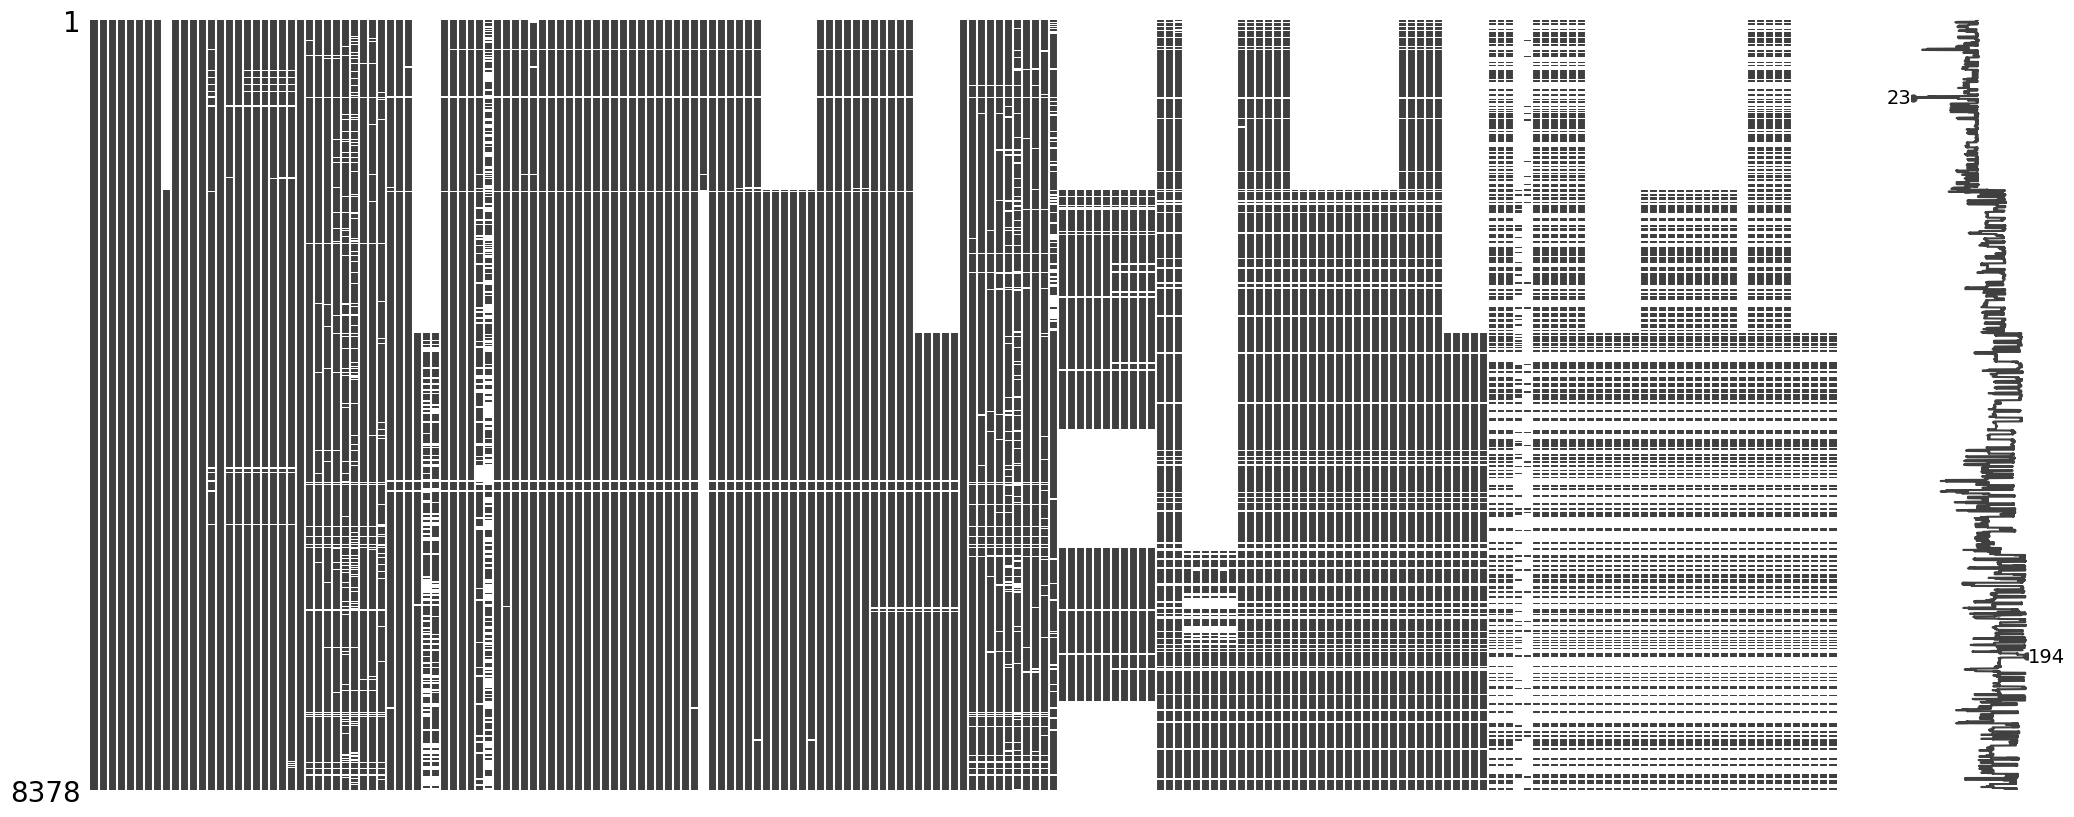

In [12]:
msno.matrix(tinder)

In [13]:
def mis_val_per(df):

    missi_val = df.isnull().sum().apply(lambda x: round(x / len(df) * 100, 2))
    return missi_val

dfcompper = mis_val_per(tinder)

fig = px.bar(x=dfcompper.index, y=dfcompper.values)
fig.show()

de combien (en pourcentage) represente les NA 

# III/. Exploration du dataset Univarié

In [14]:
print(tinder.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

In [15]:
for column in ["age", "career_c", "goal"]:
    fig = px.histogram(df[column])
    fig.show()

bref recap sur graph 

In [16]:
df_sex = tinder.groupby("iid")["gender"].mean().reset_index()
female = df_sex[df_sex["gender"] == 0]
male = df_sex[df_sex["gender"] == 1]

df = pd.DataFrame([{"gender": "female", "count": len(female)},
                   {"gender": "male", "count": len(male)}])
fig = px.pie(df,
             names="gender",
             values="count",
             color_discrete_sequence=["#fd5564"])

fig.update_layout(
    title={
        "text": "<b>Gender distribution during speed datings<b>",
        "x": 0.5
        }
)
fig.show()

bref recap sur graph 

In [17]:
df_race = tinder.groupby("iid")["race"].mean().reset_index()
Black_African = df_race[df_race["race"] == 1]
European_Caucasian = df_race[df_race["race"] == 2]
Latino_Hispanic = df_race[df_race["race"] == 3]
Asian_Pacific_Islander = df_race[df_race["race"] == 4]
Native_American = df_race[df_race["race"] == 5]
Others = df_race[df_race["race"] == 6]


df = pd.DataFrame([{"race": "Black_African", "count": len(Black_African)},
                   {"race": "European_Caucasian","count": len(European_Caucasian)},
                   {"race": "Latino_Hispanic", "count": len(Latino_Hispanic)},
                   {"race": "Asian_Pacific_Islander", "count": len(Asian_Pacific_Islander)},
                   {"race": "Native_American", "count": len(Native_American)},
                   {"race": "Others", "count": len(Others)},
                   ])
fig = px.pie(df,
             names="race",
             values="count"
             )

fig.update_layout(
    title={
        "text": "<b>Race distribution during speed datings<b>",
        "x": 0.5
        }
)
fig.show()

resumé sur graph

# IV/. Exploration du dataset Multivarié

In [18]:
tinder.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [19]:
tinder_matches = tinder[['iid', 'gender', 'age', 'race', 'wave', 'dec', 'match_es', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3']]

In [20]:
tinder_matches

iid  gender   age  race  wave  dec  match_es  you_call  them_cal  \
0       1       0  21.0   4.0     1    1       4.0       1.0       1.0   
1       1       0  21.0   4.0     1    1       4.0       1.0       1.0   
2       1       0  21.0   4.0     1    1       4.0       1.0       1.0   
3       1       0  21.0   4.0     1    1       4.0       1.0       1.0   
4       1       0  21.0   4.0     1    1       4.0       1.0       1.0   
...   ...     ...   ...   ...   ...  ...       ...       ...       ...   
8373  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8374  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8375  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8376  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8377  552       1  25.0   2.0    21    0       3.0       2.0       0.0   

      date_3  numdat_3  num_in_3  
0        0.0       NaN       NaN  
1        0.0       NaN       NaN  
2        0.0       NaN       NaN  
3        0.0       NaN       NaN  
4        0.0       NaN       NaN  
...      ...       ...       ...  
8373     0.0       NaN       1.0  
8374     0.0       NaN       1.0  
8375     0.0       NaN       1.0  
8376     0.0       NaN       1.0  
8377     0.0       NaN       1.0  

[8378 rows x 12 columns]

In [21]:
date_3 = tinder_matches['date_3'].value_counts().sort_index()
numdat_3 = tinder_matches['numdat_3'].value_counts().sort_index()
num_in_3 = tinder_matches['num_in_3'].value_counts().sort_index()

print(f'{date_3} \n')
print(f'{numdat_3} \n')
print(f'{num_in_3}')

date_3
0.0    2476
1.0    1498
Name: count, dtype: int64 

numdat_3
0.0    293
1.0    888
2.0    181
3.0     50
4.0     63
9.0     21
Name: count, dtype: int64 

num_in_3
0.0    159
1.0    430
2.0     61
4.0     18
Name: count, dtype: int64


In [22]:
import plotly.express as px

corr = tinder_matches.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


pas de correlation race / age => date 

In [23]:
import plotly.express as px

corr1 = tinder_matches[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].corr()

fig = px.imshow(
    corr1,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


quand est-il en fonction des sex ? 

In [24]:
tinder_match_male = tinder_matches[tinder_matches['gender'] == 1]
tinder_match_female = tinder_matches[tinder_matches['gender'] == 0]

In [25]:
tinder_match_male

iid  gender   age  race  wave  dec  match_es  you_call  them_cal  \
100    11       1  27.0   2.0     1    0       0.0       0.0       0.0   
101    11       1  27.0   2.0     1    0       0.0       0.0       0.0   
102    11       1  27.0   2.0     1    0       0.0       0.0       0.0   
103    11       1  27.0   2.0     1    0       0.0       0.0       0.0   
104    11       1  27.0   2.0     1    0       0.0       0.0       0.0   
...   ...     ...   ...   ...   ...  ...       ...       ...       ...   
8373  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8374  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8375  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8376  552       1  25.0   2.0    21    0       3.0       2.0       0.0   
8377  552       1  25.0   2.0    21    0       3.0       2.0       0.0   

      date_3  numdat_3  num_in_3  
100      0.0       NaN       NaN  
101      0.0       NaN       NaN  
102      0.0       NaN       NaN  
103      0.0       NaN       NaN  
104      0.0       NaN       NaN  
...      ...       ...       ...  
8373     0.0       NaN       1.0  
8374     0.0       NaN       1.0  
8375     0.0       NaN       1.0  
8376     0.0       NaN       1.0  
8377     0.0       NaN       1.0  

[4194 rows x 12 columns]

In [26]:
import plotly.express as px

corr2 = tinder_match_male.corr()

fig = px.imshow(
    corr2,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


In [27]:
import plotly.express as px

corr3 = tinder_match_male[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].corr()

fig = px.imshow(
    corr3,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


In [28]:
import plotly.express as px

corr4 = tinder_match_female.corr()

fig = px.imshow(
    corr4,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


In [29]:
import plotly.express as px

corr5 = tinder_match_female[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].corr()

fig = px.imshow(
    corr5,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()


In [30]:
import plotly.express as px

corr5 = tinder_match_female[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].corr()

fig = px.imshow(
    corr5,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1
)
fig.show()

In [31]:
info_list_step_1 = ['iid', 'gender', 'match',
                    'attr1_1', 'sinc1_1', 'intel1_1', 
                    'fun1_1', 'amb1_1','shar1_1', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

In [46]:
tinder_step_1 = tinder[info_list_step_1]
tinder_step_1

iid  gender  match  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  \
0       1       0      0     15.0     20.0      20.0    15.0    15.0     15.0   
1       1       0      0     15.0     20.0      20.0    15.0    15.0     15.0   
2       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
3       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
4       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
...   ...     ...    ...      ...      ...       ...     ...     ...      ...   
8373  552       1      0     70.0      0.0      15.0    15.0     0.0      0.0   
8374  552       1      0     70.0      0.0      15.0    15.0     0.0      0.0   
8375  552       1      0     70.0      0.0      15.0    15.0     0.0      0.0   
8376  552       1      0     70.0      0.0      15.0    15.0     0.0      0.0   
8377  552       1      0     70.0      0.0      15.0    15.0     0.0      0.0   

      you_call  date_3  numdat_3  num_in_3  
0          1.0     0.0       NaN       NaN  
1          1.0     0.0       NaN       NaN  
2          1.0     0.0       NaN       NaN  
3          1.0     0.0       NaN       NaN  
4          1.0     0.0       NaN       NaN  
...        ...     ...       ...       ...  
8373       2.0     0.0       NaN       1.0  
8374       2.0     0.0       NaN       1.0  
8375       2.0     0.0       NaN       1.0  
8376       2.0     0.0       NaN       1.0  
8377       2.0     0.0       NaN       1.0  

[8378 rows x 13 columns]

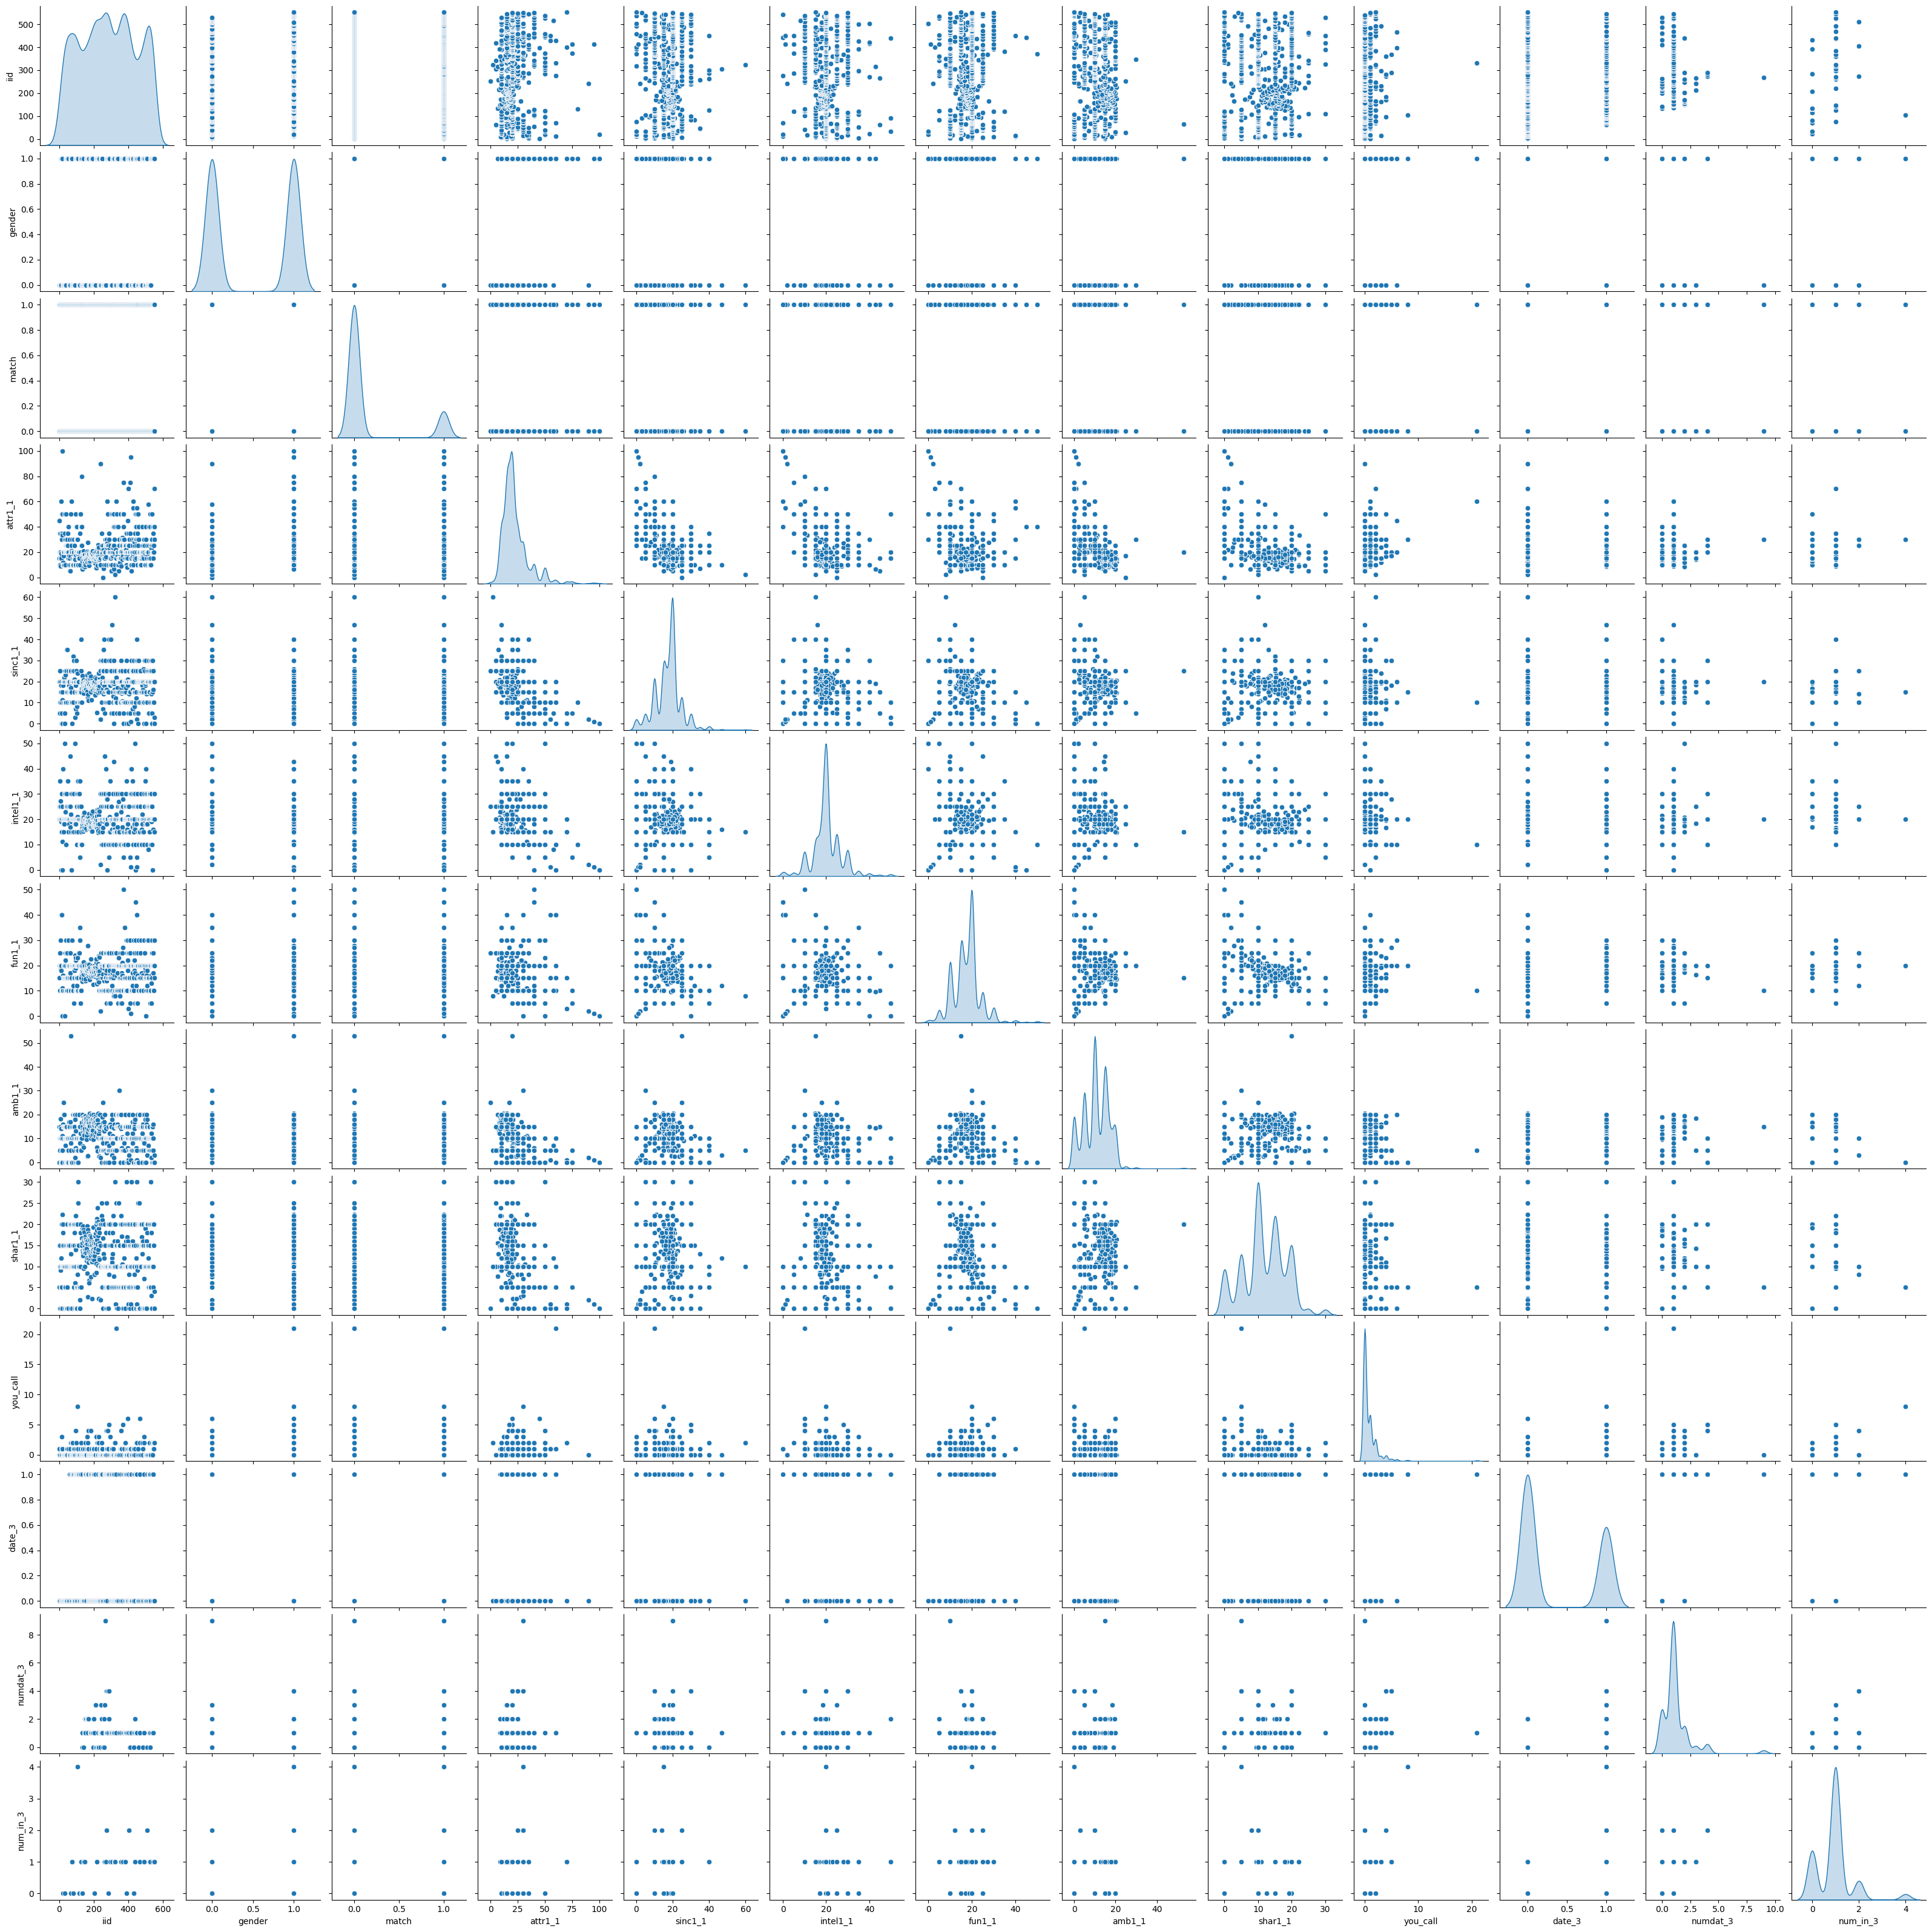

In [ ]:
sns.pairplot(tinder_step_1, diag_kind='kde', corner=False)

par attribu => est-ce qu'il y a match + est-ce que tu as appellé + y a t-il eu un date ? 
step 1 step s step 2 step 3 

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['attr1_1'],
    name="step 1 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['sinc1_1'],
    name="step 1 sincerity"
))

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['intel1_1'],
    name="step 1 intelligence"
))

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['fun1_1'],
    name="step 1 fun"
))

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['amb1_1'],
    name="step 1 ambition"
))

fig.add_trace(go.Bar(
    x=tinder_step_1['you_call'],
    y=tinder_step_1['shar1_1'],
    name="step 1 share interesset"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(
    title={
        "text": "<b>let's try</b>",
        "x": 0.5},
    yaxis_title="Score"
)

# Affichage du graphique
fig.show()

In [47]:
info_list_step_s = ['iid', 'gender', 'match',
                    'attr1_s', 'sinc1_s', 'intel1_s', 
                    'fun1_s', 'amb1_s','shar1_s', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

tinder_step_s = tinder[info_list_step_s]
tinder_step_s

iid  gender  match  attr1_s  sinc1_s  intel1_s  fun1_s  amb1_s  shar1_s  \
0       1       0      0      NaN      NaN       NaN     NaN     NaN      NaN   
1       1       0      0      NaN      NaN       NaN     NaN     NaN      NaN   
2       1       0      1      NaN      NaN       NaN     NaN     NaN      NaN   
3       1       0      1      NaN      NaN       NaN     NaN     NaN      NaN   
4       1       0      1      NaN      NaN       NaN     NaN     NaN      NaN   
...   ...     ...    ...      ...      ...       ...     ...     ...      ...   
8373  552       1      0      NaN      NaN       NaN     NaN     NaN      NaN   
8374  552       1      0      NaN      NaN       NaN     NaN     NaN      NaN   
8375  552       1      0      NaN      NaN       NaN     NaN     NaN      NaN   
8376  552       1      0      NaN      NaN       NaN     NaN     NaN      NaN   
8377  552       1      0      NaN      NaN       NaN     NaN     NaN      NaN   

      you_call  date_3  numdat_3  num_in_3  
0          1.0     0.0       NaN       NaN  
1          1.0     0.0       NaN       NaN  
2          1.0     0.0       NaN       NaN  
3          1.0     0.0       NaN       NaN  
4          1.0     0.0       NaN       NaN  
...        ...     ...       ...       ...  
8373       2.0     0.0       NaN       1.0  
8374       2.0     0.0       NaN       1.0  
8375       2.0     0.0       NaN       1.0  
8376       2.0     0.0       NaN       1.0  
8377       2.0     0.0       NaN       1.0  

[8378 rows x 13 columns]

In [50]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['attr1_s'],
    name="step s attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['sinc1_s'],
    name="step s sincerity"
))

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['intel1_s'],
    name="step s intelligence"
))

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['fun1_s'],
    name="step s fun"
))

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['amb1_s'],
    name="step s ambition"
))

fig.add_trace(go.Bar(
    x=tinder_step_s['you_call'],
    y=tinder_step_s['shar1_s'],
    name="step s share interesset"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(
    title={
        "text": "<b>let's try</b>",
        "x": 0.5},
    yaxis_title="Score"
)

# Affichage du graphique
fig.show()

In [51]:
info_list_step_2 = ['iid', 'gender', 'match',
                    'attr1_2', 'sinc1_2', 'intel1_2', 
                    'fun1_2', 'amb1_2','shar1_2', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

tinder_step_2 = tinder[info_list_step_2]
tinder_step_2

iid  gender  match  attr1_2  sinc1_2  intel1_2  fun1_2  amb1_2  shar1_2  \
0       1       0      0    19.44    16.67     13.89   22.22   11.11    16.67   
1       1       0      0    19.44    16.67     13.89   22.22   11.11    16.67   
2       1       0      1    19.44    16.67     13.89   22.22   11.11    16.67   
3       1       0      1    19.44    16.67     13.89   22.22   11.11    16.67   
4       1       0      1    19.44    16.67     13.89   22.22   11.11    16.67   
...   ...     ...    ...      ...      ...       ...     ...     ...      ...   
8373  552       1      0    70.00     0.00     15.00   10.00    0.00     5.00   
8374  552       1      0    70.00     0.00     15.00   10.00    0.00     5.00   
8375  552       1      0    70.00     0.00     15.00   10.00    0.00     5.00   
8376  552       1      0    70.00     0.00     15.00   10.00    0.00     5.00   
8377  552       1      0    70.00     0.00     15.00   10.00    0.00     5.00   

      you_call  date_3  numdat_3  num_in_3  
0          1.0     0.0       NaN       NaN  
1          1.0     0.0       NaN       NaN  
2          1.0     0.0       NaN       NaN  
3          1.0     0.0       NaN       NaN  
4          1.0     0.0       NaN       NaN  
...        ...     ...       ...       ...  
8373       2.0     0.0       NaN       1.0  
8374       2.0     0.0       NaN       1.0  
8375       2.0     0.0       NaN       1.0  
8376       2.0     0.0       NaN       1.0  
8377       2.0     0.0       NaN       1.0  

[8378 rows x 13 columns]

In [52]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['attr1_2'],
    name="step 2 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['sinc1_2'],
    name="step 2 sincerity"
))

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['intel1_2'],
    name="step 2 intelligence"
))

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['fun1_2'],
    name="step 2 fun"
))

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['amb1_2'],
    name="step 2 ambition"
))

fig.add_trace(go.Bar(
    x=tinder_step_2['you_call'],
    y=tinder_step_2['shar1_2'],
    name="step 2 share interesset"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(
    title={
        "text": "<b>let's try</b>",
        "x": 0.5},
    yaxis_title="Score"
)

# Affichage du graphique
fig.show()

In [53]:
info_list_step_3 = ['iid', 'gender', 'match',
                    'attr1_3', 'sinc1_3', 'intel1_3', 
                    'fun1_3', 'amb1_3','shar1_3', 
                    'you_call', 'date_3', 'numdat_3','num_in_3']

tinder_step_3 = tinder[info_list_step_3]
tinder_step_3

iid  gender  match  attr1_3  sinc1_3  intel1_3  fun1_3  amb1_3  shar1_3  \
0       1       0      0     15.0     20.0      20.0    15.0    15.0     15.0   
1       1       0      0     15.0     20.0      20.0    15.0    15.0     15.0   
2       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
3       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
4       1       0      1     15.0     20.0      20.0    15.0    15.0     15.0   
...   ...     ...    ...      ...      ...       ...     ...     ...      ...   
8373  552       1      0     70.0      0.0      20.0    10.0     0.0      0.0   
8374  552       1      0     70.0      0.0      20.0    10.0     0.0      0.0   
8375  552       1      0     70.0      0.0      20.0    10.0     0.0      0.0   
8376  552       1      0     70.0      0.0      20.0    10.0     0.0      0.0   
8377  552       1      0     70.0      0.0      20.0    10.0     0.0      0.0   

      you_call  date_3  numdat_3  num_in_3  
0          1.0     0.0       NaN       NaN  
1          1.0     0.0       NaN       NaN  
2          1.0     0.0       NaN       NaN  
3          1.0     0.0       NaN       NaN  
4          1.0     0.0       NaN       NaN  
...        ...     ...       ...       ...  
8373       2.0     0.0       NaN       1.0  
8374       2.0     0.0       NaN       1.0  
8375       2.0     0.0       NaN       1.0  
8376       2.0     0.0       NaN       1.0  
8377       2.0     0.0       NaN       1.0  

[8378 rows x 13 columns]

In [54]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['attr1_3'],
    name="step 3 attractiveness",
    opacity=1
))

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['sinc1_3'],
    name="step 3 sincerity"
))

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['intel1_3'],
    name="step 3 intelligence"
))

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['fun1_3'],
    name="step 3 fun"
))

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['amb1_3'],
    name="step 3 ambition"
))

fig.add_trace(go.Bar(
    x=tinder_step_3['you_call'],
    y=tinder_step_3['shar1_3'],
    name="step 3 share interesset"
))

fig.update_traces(marker_line_width = 0)

fig.update_layout(
    title={
        "text": "<b>let's try</b>",
        "x": 0.5},
    yaxis_title="Score"
)

# Affichage du graphique
fig.show()

# V/. ouverture

**Quelle est l'importance de l'attractivité ?**

Le graphique ci-dessous compare l'importance estimée de l'attractivité par les participants par rapport à son importance réelle lors des speed datings en fonction des sex.


In [16]:
tinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [17]:
print(tinder.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

Key explaining the nomeclature of the attribute columns:

1_ | Attribute looked for in other sex  
2_ | Attribute looked for by other sex  
3_ | Self-rating of attributes (based on your own opinion)  
4_ | Attribute looked for by other people of your sex  
5_ | Self-rating of attributes (based on what they thought others perceived)  
7_ | Rating of importance of attributes in terms of contribution to your decisions  

_1 | Filled out before event  
_2 | Filled out a day after the event  
_3 | Filled out 3-4 weeks after the event  
_s | Filled out halfway through the event  

In [18]:
tinder_male = tinder[tinder['gender'] == 1]
tinder_female = tinder[tinder['gender'] == 0]

séparation des wave

In [49]:
tinder

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8373  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8374  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8375  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8376  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8377  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   

      intel5_3  fun5_3  amb5_3  
0          NaN     NaN     NaN  
1          NaN     NaN     NaN  
2          NaN     NaN     NaN  
3          NaN     NaN     NaN  
4          NaN     NaN     NaN  
...        ...     ...     ...  
8373       9.0     5.0     6.0  
8374       9.0     5.0     6.0  
8375       9.0     5.0     6.0  
8376       9.0     5.0     6.0  
8377       9.0     5.0     6.0  

[8378 rows x 195 columns]

### male

In [20]:
tinder_male.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
100   11  1.0       1    2       1     1     10         7       NaN      4   
101   11  1.0       1    2       1     1     10         3       NaN     10   
102   11  1.0       1    2       1     1     10         9       NaN      6   
103   11  1.0       1    2       1     1     10         6       NaN      3   
104   11  1.0       1    2       1     1     10         4       NaN      1   

     ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
100  ...      7.0      8.0       7.0     7.0     5.0      NaN      NaN   
101  ...      7.0      8.0       7.0     7.0     5.0      NaN      NaN   
102  ...      7.0      8.0       7.0     7.0     5.0      NaN      NaN   
103  ...      7.0      8.0       7.0     7.0     5.0      NaN      NaN   
104  ...      7.0      8.0       7.0     7.0     5.0      NaN      NaN   

     intel5_3  fun5_3  amb5_3  
100       NaN     NaN     NaN  
101       NaN     NaN     NaN  
102       NaN     NaN     NaN  
103       NaN     NaN     NaN  
104       NaN     NaN     NaN  

[5 rows x 195 columns]

In [32]:
tinder_attr_m = tinder_male[['iid','wave','attr1_1', 'attr1_s','attr1_2','attr1_3']]
tinder_attr_m.head()

iid  wave  attr1_1  attr1_s  attr1_2  attr1_3
100   11     1     35.0      NaN    19.51     35.0
101   11     1     35.0      NaN    19.51     35.0
102   11     1     35.0      NaN    19.51     35.0
103   11     1     35.0      NaN    19.51     35.0
104   11     1     35.0      NaN    19.51     35.0

<Axes: >

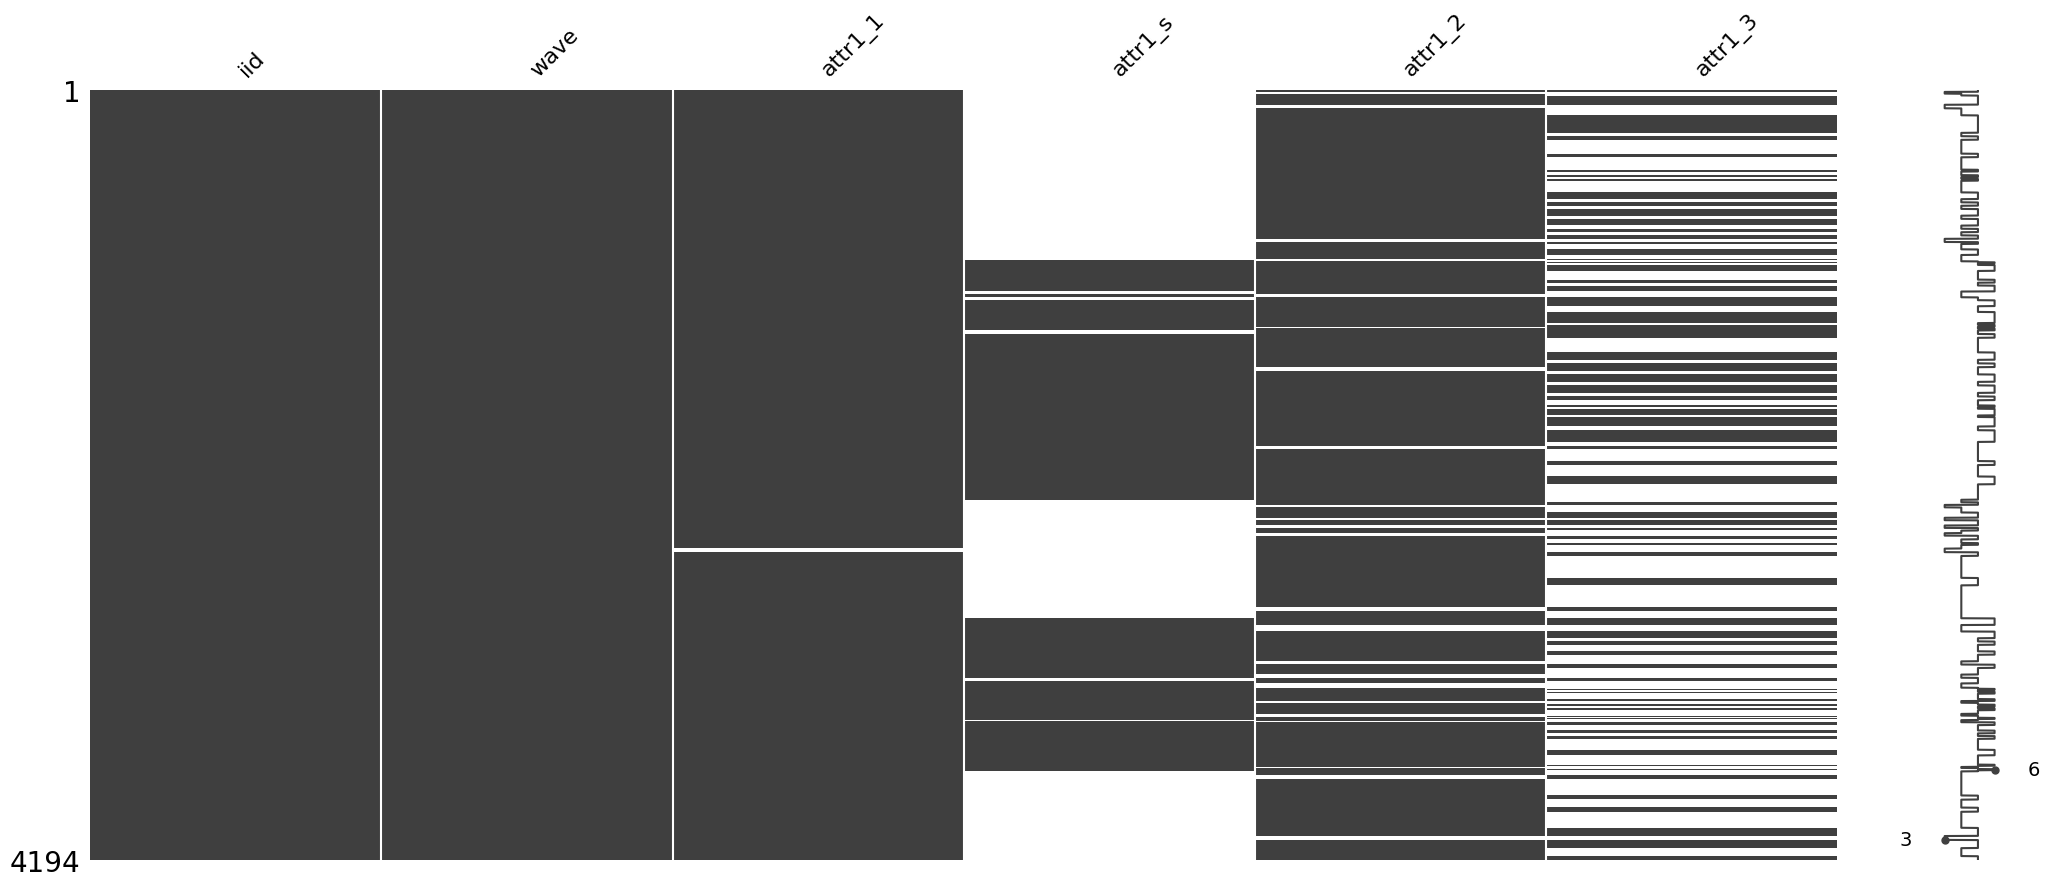

In [33]:
msno.matrix(tinder_attr_m)

In [67]:
tinder_attr_m['wave'].value_counts().sort_index()

wave
1     100
2     304
3     100
4     324
5     100
6      25
7     256
8     100
9     400
10     81
11    441
12    196
13     90
14    360
15    342
16     48
17    140
18     36
19    225
20     42
21    484
Name: count, dtype: int64

In [37]:
tinder_attr_m_copy = tinder_attr_m.copy(deep=True)

In [47]:
tinder_attr_m_copy

iid  wave  attr1_1  attr1_s  attr1_2  attr1_3
100    11     1     35.0      NaN    19.51     35.0
101    11     1     35.0      NaN    19.51     35.0
102    11     1     35.0      NaN    19.51     35.0
103    11     1     35.0      NaN    19.51     35.0
104    11     1     35.0      NaN    19.51     35.0
...   ...   ...      ...      ...      ...      ...
8373  552    21     70.0      NaN    70.00     70.0
8374  552    21     70.0      NaN    70.00     70.0
8375  552    21     70.0      NaN    70.00     70.0
8376  552    21     70.0      NaN    70.00     70.0
8377  552    21     70.0      NaN    70.00     70.0

[4194 rows x 6 columns]

In [ ]:
wave6789 = [6,7,8,9]
tinder_attr_m_copy_w6789 = tinder_attr_m_copy[tinder_attr_m_copy['wave'].isin(wave6789)]
tinder_attr_m_copy_w6789

iid  wave  attr1_1  attr1_s  attr1_2  attr1_3
1871  137     6    17.39    16.67      NaN      NaN
1872  137     6    17.39    16.67      NaN      NaN
1873  137     6    17.39    16.67      NaN      NaN
1874  137     6    17.39    16.67      NaN      NaN
1875  137     6    17.39    16.67      NaN      NaN
...   ...   ...      ...      ...      ...      ...
3403  233     9    14.00    14.89    13.33      NaN
3404  233     9    14.00    14.89    13.33      NaN
3405  233     9    14.00    14.89    13.33      NaN
3406  233     9    14.00    14.89    13.33      NaN
3407  233     9    14.00    14.89    13.33      NaN

[781 rows x 6 columns]

In [ ]:
wave151021 = [1,2,3,4,5,10,11,12,13,14,15,16,17,18,19,20,21]
tinder_attr_m_copy_w151021 = tinder_attr_m_copy[tinder_attr_m_copy['wave'].isin(wave151021)]
tinder_attr_m_copy_w151021

iid  wave  attr1_1  attr1_s  attr1_2  attr1_3
100    11     1     35.0      NaN    19.51     35.0
101    11     1     35.0      NaN    19.51     35.0
102    11     1     35.0      NaN    19.51     35.0
103    11     1     35.0      NaN    19.51     35.0
104    11     1     35.0      NaN    19.51     35.0
...   ...   ...      ...      ...      ...      ...
8373  552    21     70.0      NaN    70.00     70.0
8374  552    21     70.0      NaN    70.00     70.0
8375  552    21     70.0      NaN    70.00     70.0
8376  552    21     70.0      NaN    70.00     70.0
8377  552    21     70.0      NaN    70.00     70.0

[3413 rows x 6 columns]

In [83]:
for i in range(1,4,1):
    result1 = tinder_attr_m_copy_w6789[f'attr1_{i}'].isnull().sum()/len(tinder_attr_m_copy_w6789[f'attr1_{i}'])
    result2 = tinder_attr_m_copy_w151021[f'attr1_{i}'].isnull().sum()/len(tinder_attr_m_copy_w151021[f'attr1_{i}'])
    print(f' wave 6789 => attr_1_{i} = {result1}')
    print(f' wave 151021 => attr_1_{i} = {result2} \n')

 wave 6789 => attr_1_1 = 0.0
 wave 151021 => attr_1_1 = 0.005859947260474656 

 wave 6789 => attr_1_2 = 0.06530089628681178
 wave 151021 => attr_1_2 = 0.09756812188690302 

 wave 6789 => attr_1_3 = 0.4327784891165173
 wave 151021 => attr_1_3 = 0.6082625256372692 



In [74]:
tinder_attr_m_copy_w6789.attr1_s.isnull().sum()/len(tinder_attr_m_copy_w6789.attr1_s)

np.float64(0.06658130601792574)

In [75]:
tinder_attr_m_copy_w151021.attr1_s.isnull().sum()/len(tinder_attr_m_copy_w151021.attr1_s)

np.float64(0.6100205098154117)

### female

In [24]:
tinder_attr_f = tinder_female[['iid','attr1_1', 'attr1_s','attr1_2','attr1_3']]
tinder_attr_f.head()

iid  attr1_1  attr1_s  attr1_2  attr1_3
0    1     15.0      NaN    19.44     15.0
1    1     15.0      NaN    19.44     15.0
2    1     15.0      NaN    19.44     15.0
3    1     15.0      NaN    19.44     15.0
4    1     15.0      NaN    19.44     15.0

<Axes: >

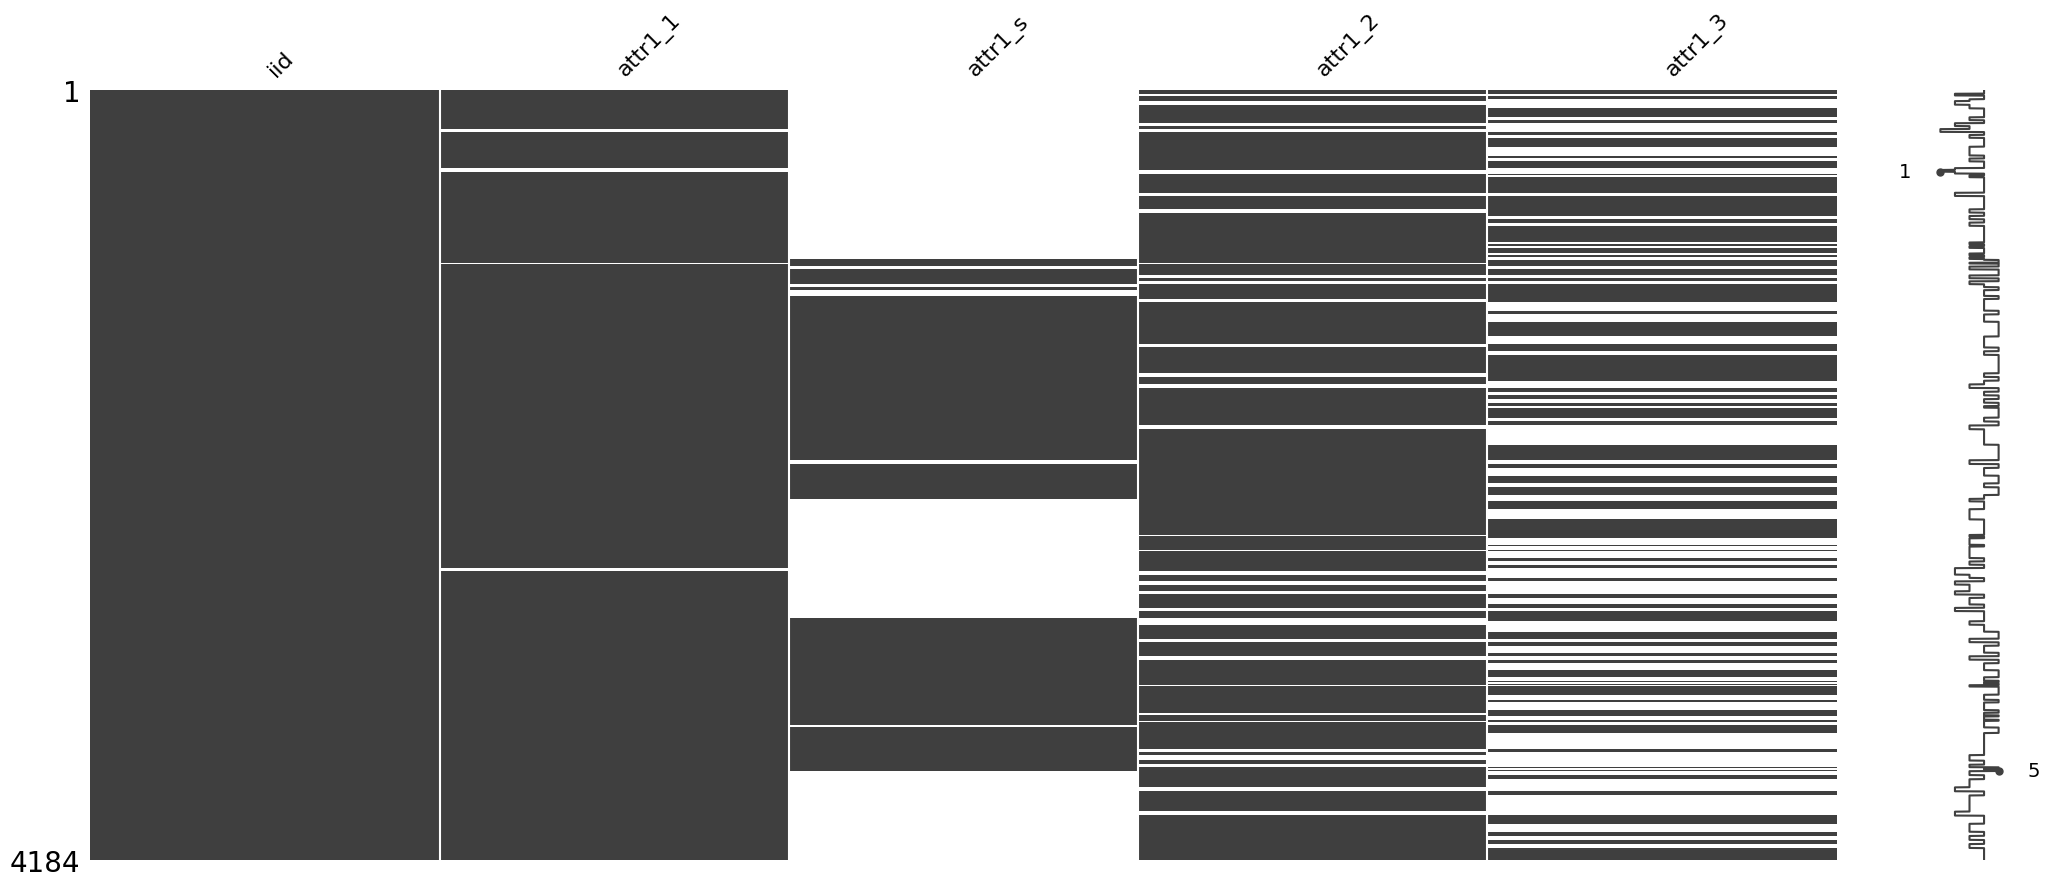

In [25]:
msno.matrix(tinder_attr_f)

In [29]:
tinder_attr_f.attr1_3.isnull().sum()/len(tinder_attr_f.attr1_3)

np.float64(0.47562141491395793)